# Import Libraries

In [183]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Reading Data by using pandas

In [184]:
df=pd.read_csv("/kaggle/input/chess-game/chess_games.csv")

### Reading first 5 rows

In [185]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


# Explore Data 

### Exploring DataFrame Structure: Overview of Column Names and Types

In [186]:
df.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

### Overview of DataFrame Information

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

### Total Number Of Duplicated Entries

In [188]:
df.duplicated().sum()

0

### Checking null values

In [189]:
df.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

### Correlation Analysis of Game Characteristics and Player Ratings in Chess Matches

In [190]:
n_columns=['rated','turns', 'white_rating', 'black_rating']
df_num=df[n_columns]
cor=df_num.corr()
cor

,rated,turns,white_rating,black_rating
rated,1.000000,0.090698,0.003284,0.032655
turns,0.090698,1.000000,0.129753,0.160467
white_rating,0.003284,0.129753,1.000000,0.634171
black_rating,0.032655,0.160467,0.634171,1.000000


### Correlation Matrix of Key Chess Game Features

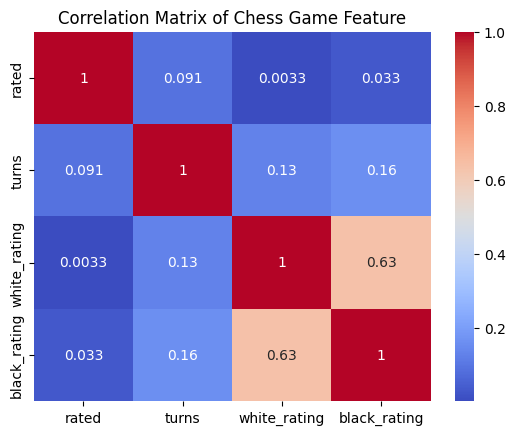

In [191]:
sns.heatmap(cor,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Chess Game Feature")
plt.show()

# Data Analysis

### Distribution of Winners in Chess Games

In [192]:
c_winner=df["winner"].value_counts()
c_winner

winner
White    10001
Black     9107
Draw       950
Name: count, dtype: int64

### Game Outcome Distribution 

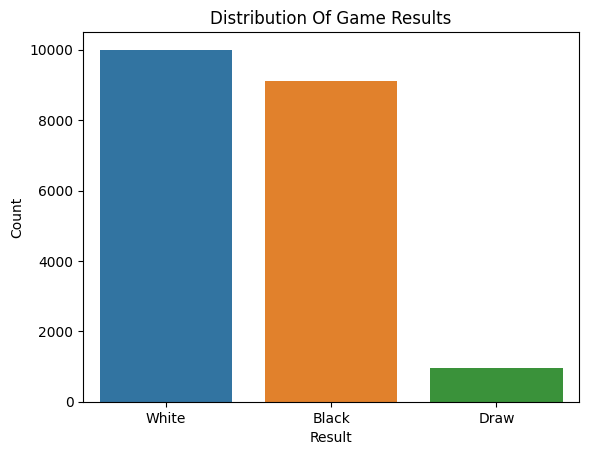

In [193]:
sns.countplot(x='winner', data=df)
plt.title("Distribution Of Game Results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

### Distribution of Victory Status

In [194]:
victoryStatus=df["victory_status"].value_counts()
victoryStatus

victory_status
Resign         11147
Mate            6325
Out of Time     1680
Draw             906
Name: count, dtype: int64

### Bar Plot of Victory Status Counts

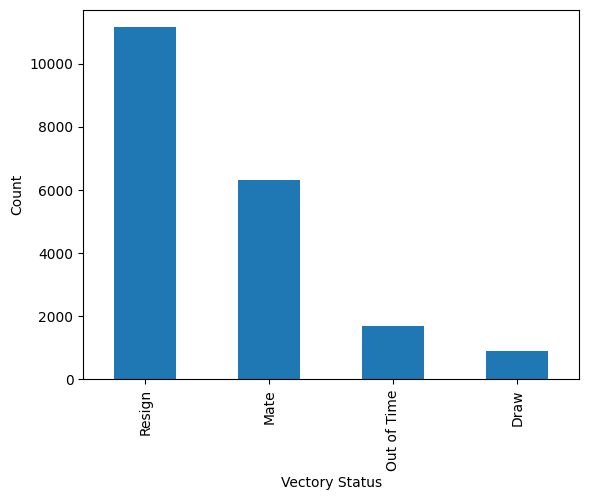

In [195]:
victoryStatus.plot(kind="bar")
plt.xlabel("Vectory Status")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of Winners and Victory Statuses

In [196]:
pd.crosstab(df["winner"],df["victory_status"])

victory_status,Draw,Mate,Out of Time,Resign
winner,,,,
Black,0,2981,823,5303
Draw,906,0,44,0
White,0,3344,813,5844


### Horizontal Bar Plot of Victory Statuses by Winner

<Axes: ylabel='winner'>

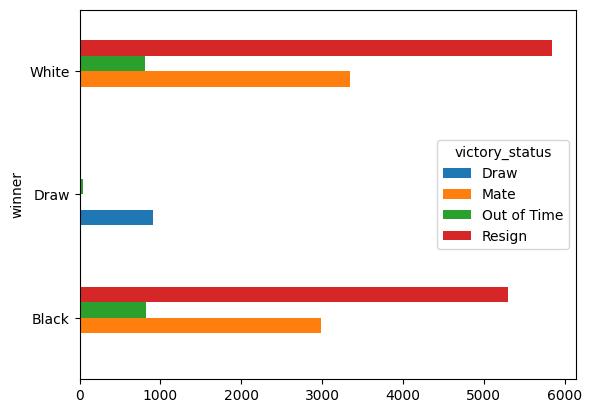

In [197]:
pd.crosstab(df["winner"],df["victory_status"]).plot(kind="barh")

### Time Increment Analysis After Transformation

In [198]:
df['time_increment'] = df['time_increment'].apply(lambda x: int(x.split('+')[0]) + int(x.split('+')[1]))


### Distribution of Encoded Winner Values

In [199]:
from sklearn.preprocessing import LabelEncoder
le_winner=LabelEncoder()
df['winner']=le_winner.fit_transform(df['winner'])

### Pairwise Relationships Between Features

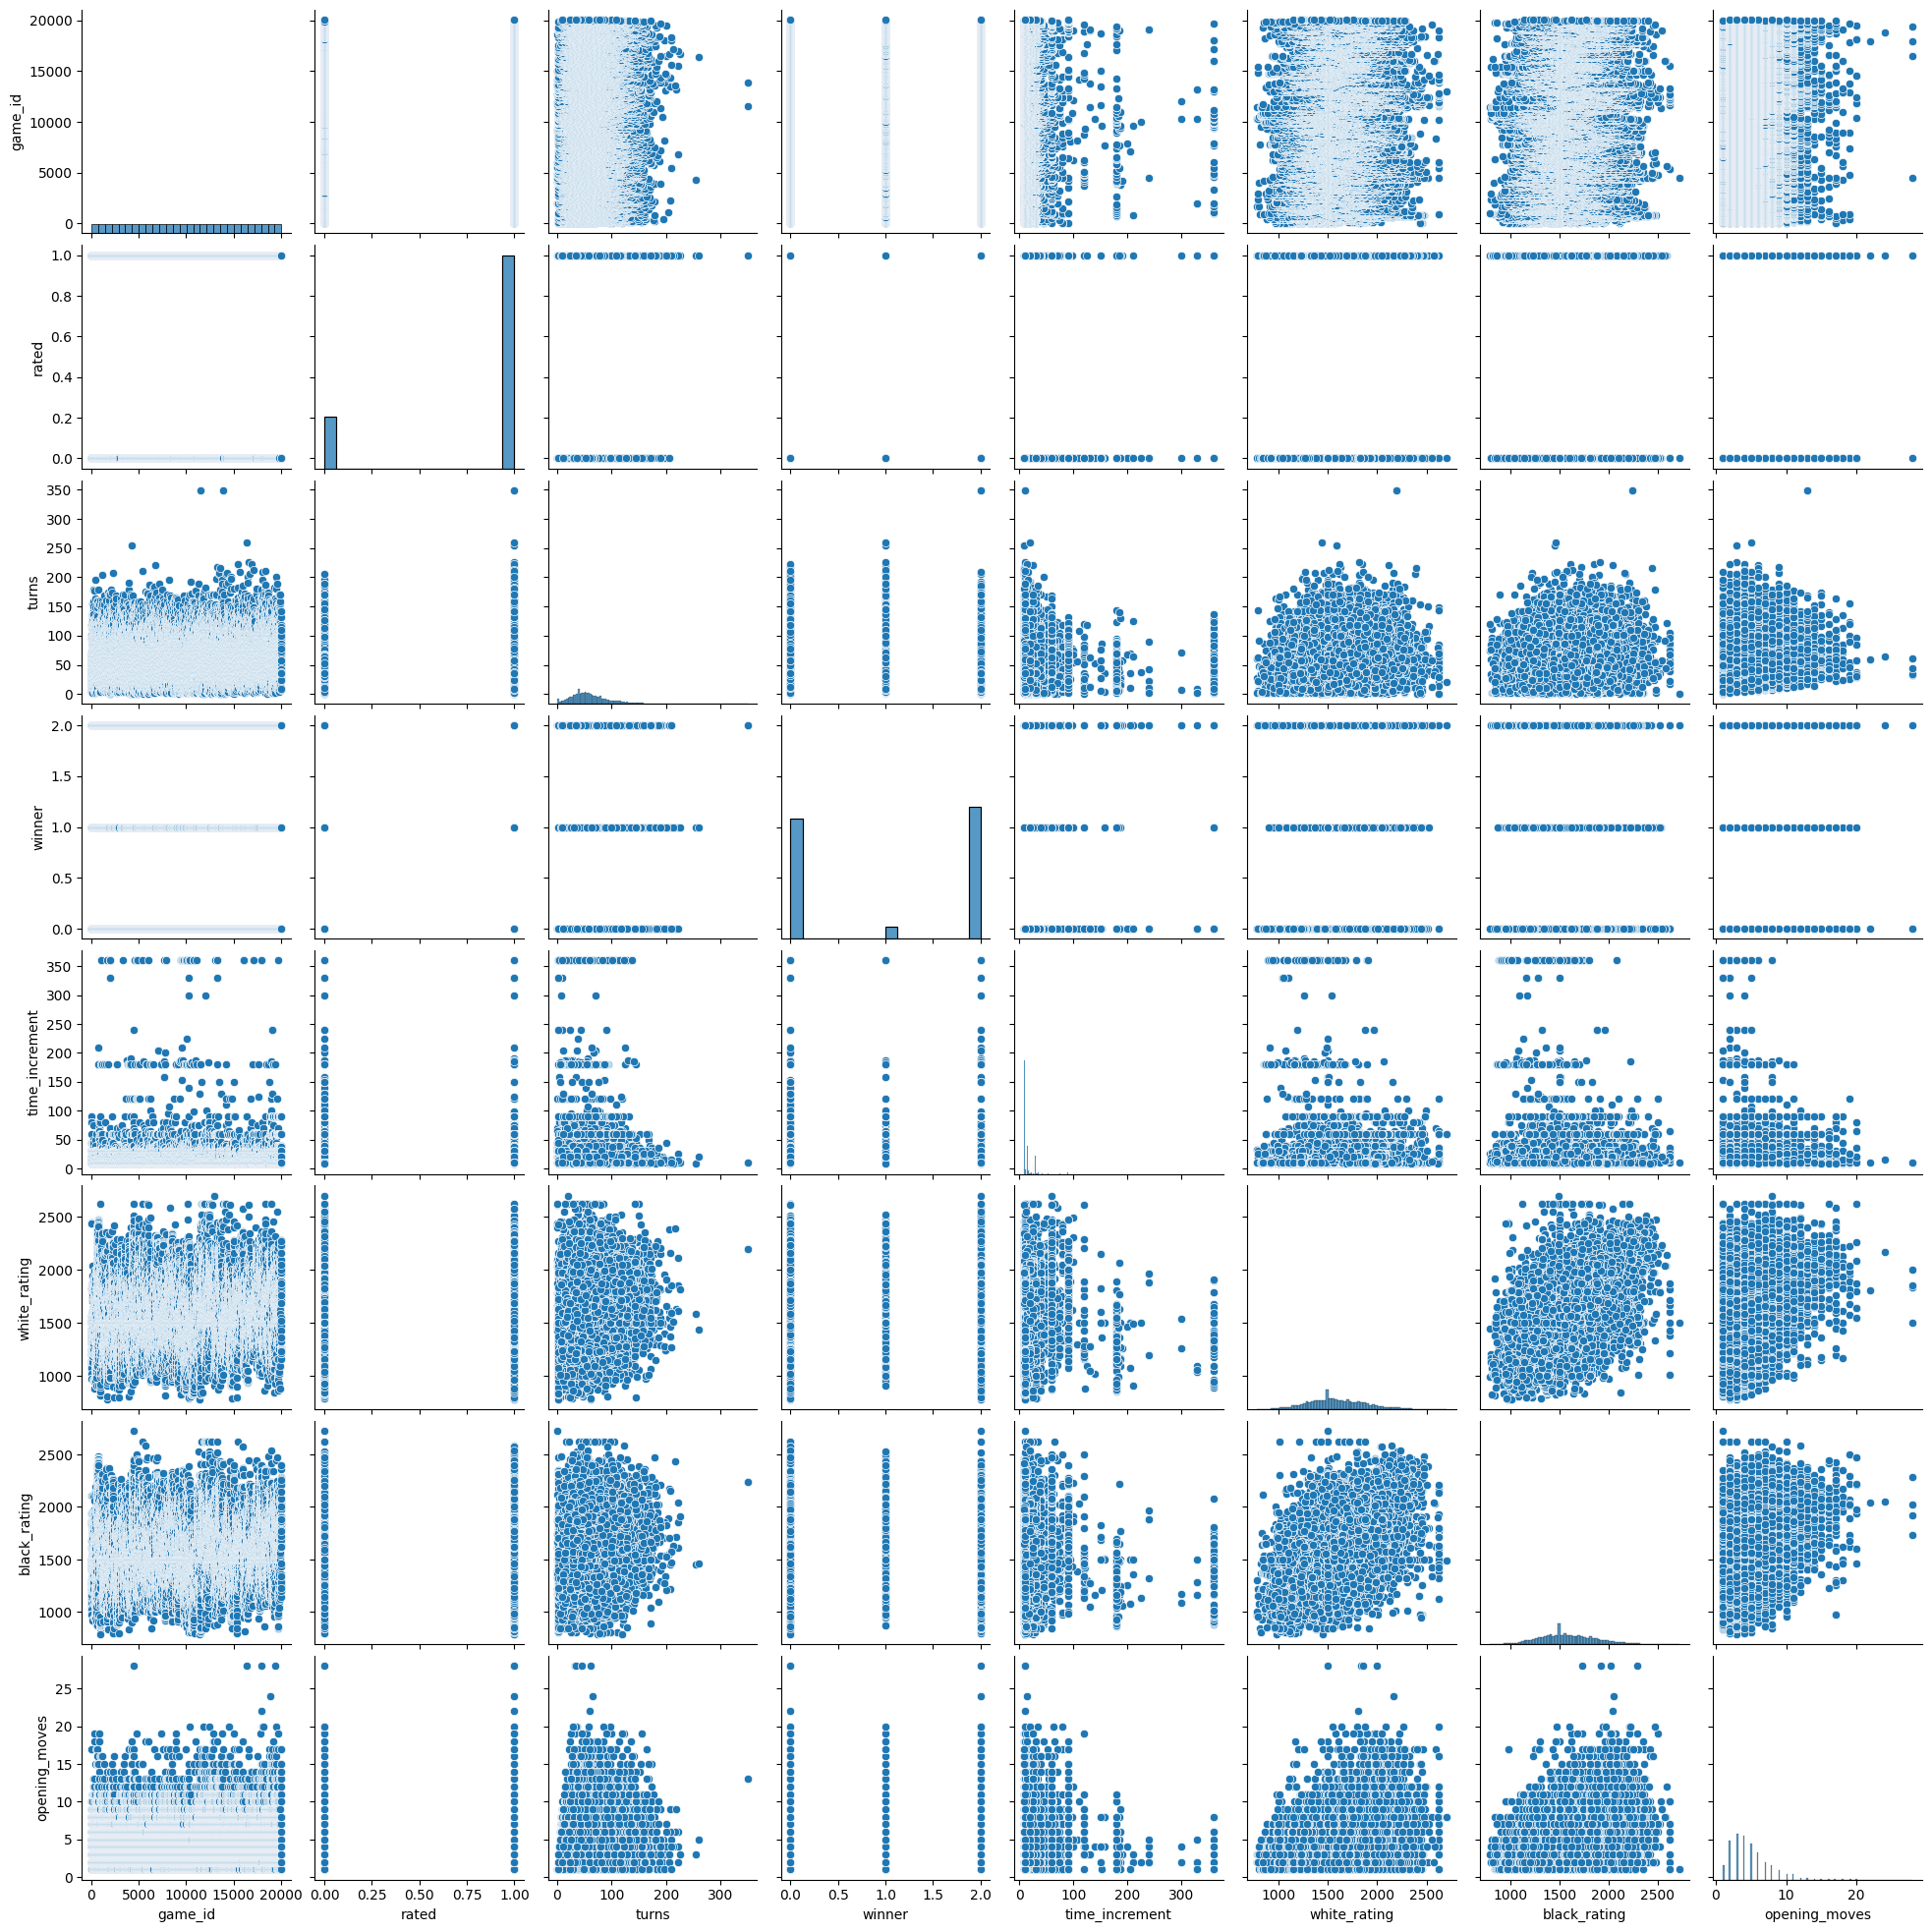

In [201]:
sns.pairplot(df)
plt.show()

### Distribution of Features in the Dataset

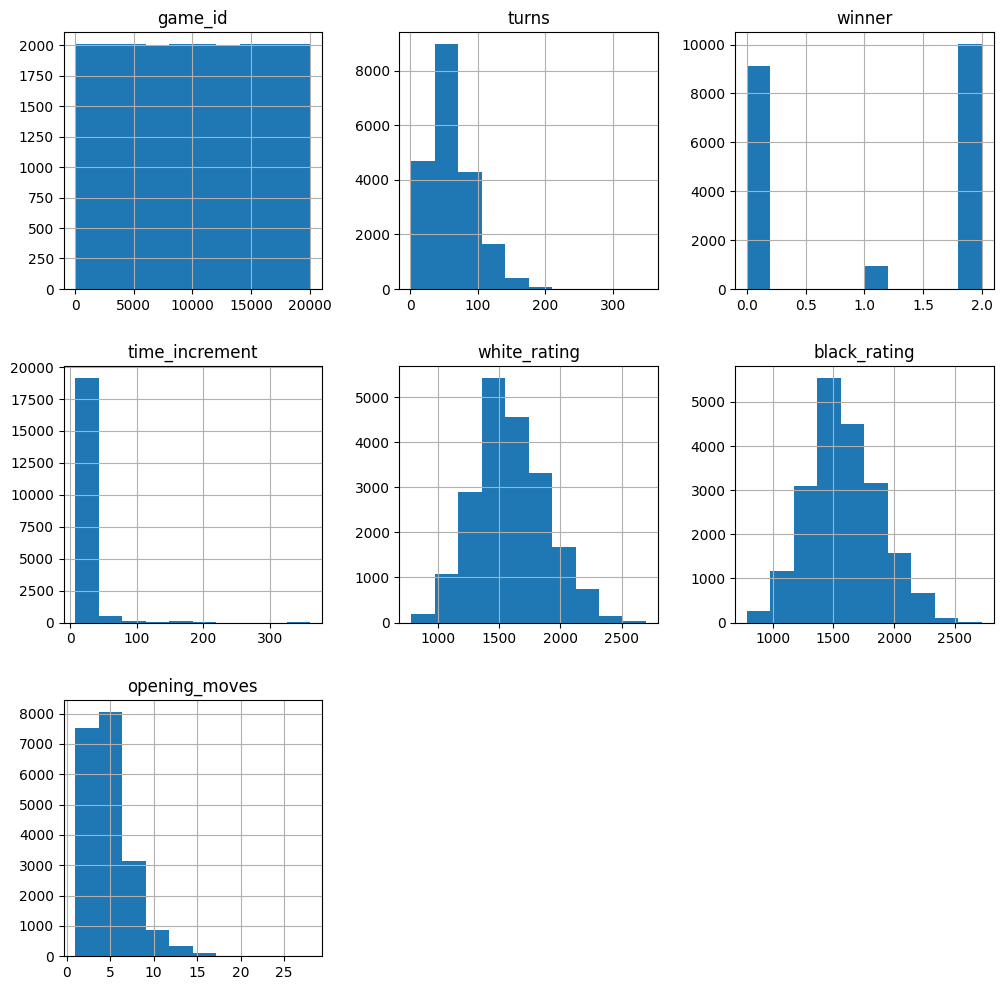

In [202]:
df.hist(figsize=(12,12))
plt.show()

### Turn and Victory Status Data After Mapping

In [203]:
x=df[["turns","victory_status"]]
y=df["winner"]
victory_status_map = {'Out of Time': 2, 'Resign': 0, 'Mate': 3, 'Draw': 1}
x['victory_status'] = x['victory_status'].map(victory_status_map)

# Building Model

### Training and Test Set Split Overview

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


### Shapes of Training and Test Sets

In [224]:
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of x_train : (16046, 2)
Shape of x_test : (4012, 2)
Shape of y_train : (16046,)
Shape of y_test : (4012,)


### Regression Models and Performance Metrics

In [225]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix

### Model Definitions and Initializations

In [226]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()

model5=SVR()
model6=XGBRegressor()
model7=DecisionTreeClassifier()

model8= RandomForestClassifier(n_estimators=1000, random_state=42)

### Performance Metrics of Different Algorithms

In [227]:
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR','xgboost','DecisionTreeClassifier','RandomForestClassifier']
Accuracy=[]
R2=[]
RMSE=[]

### Model Evaluation: Accuracy, R2, RMSE, and Confusion Matrix

In [228]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

def models(model):
    global x_train, y_train, x_test, y_test
    print(model)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict the class labels
    y_pred = model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    rmse= np.sqrt(mean_squared_error(y_test,y_pred))
    R2.append(r2)
    RMSE.append(rmse)
    # Check if the output is continuous (e.g., probabilities) and convert to class labels
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    
    # Check if y_test is also a 1D array
    if y_test.ndim > 1:
        y_test = y_test.flatten()

    # Ensure both y_test and y_pred are integers for classification metrics
    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score: {:.2f}".format(accuracy))
    Accuracy.append(accuracy)
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    plt.title('Confusion Matrix')
    plt.show()


LinearRegression()
Accuracy score: 0.09


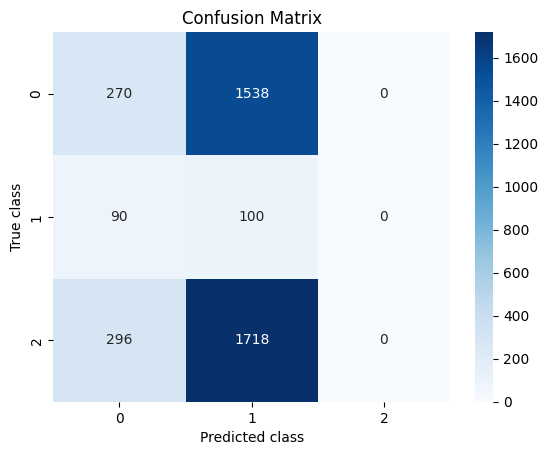

In [229]:
models(model1)

DecisionTreeRegressor()
Accuracy score: 0.66


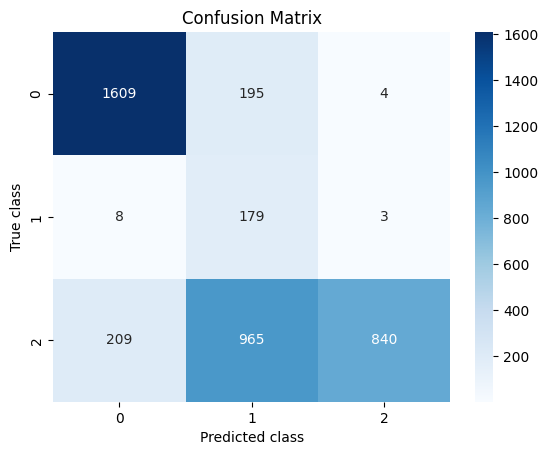

In [230]:
models(model2)

RandomForestRegressor()
Accuracy score: 0.63


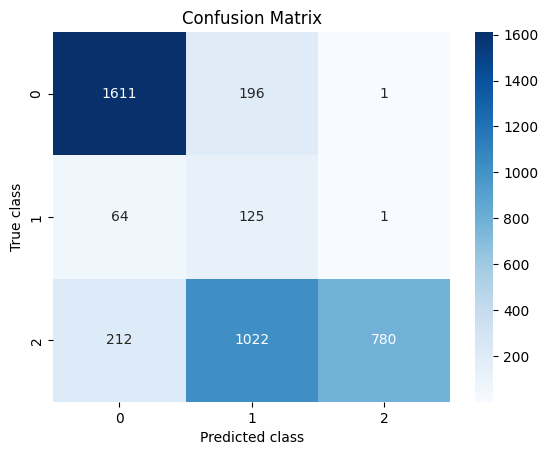

In [231]:
models(model3)

GradientBoostingRegressor()
Accuracy score: 0.37


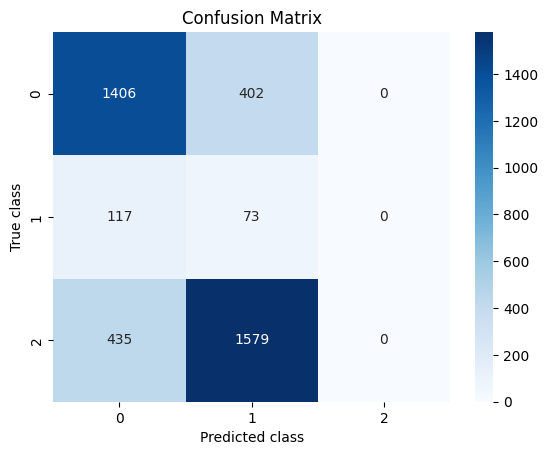

In [232]:
models(model4)

SVR()
Accuracy score: 0.11


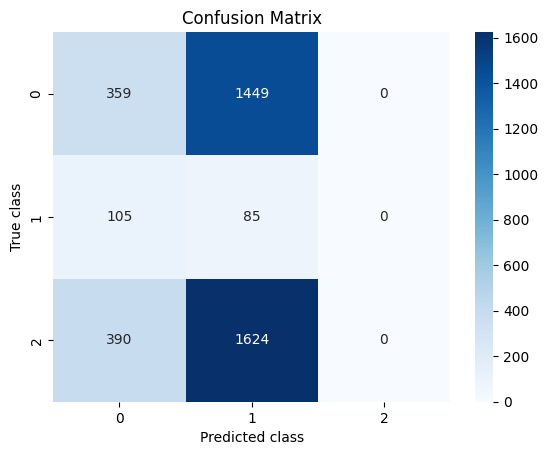

In [233]:
models(model5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Accuracy score: 0.43


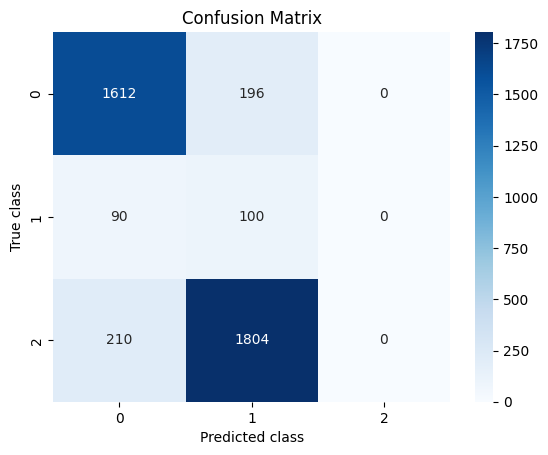

In [234]:
models(model6)

DecisionTreeClassifier()
Accuracy score: 0.89


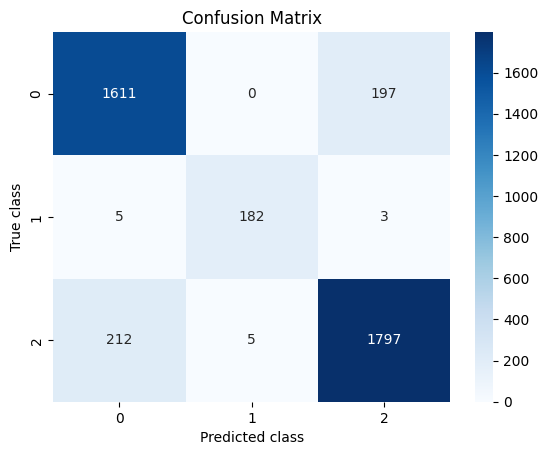

In [235]:
models(model7)

RandomForestClassifier(n_estimators=1000, random_state=42)
Accuracy score: 0.90


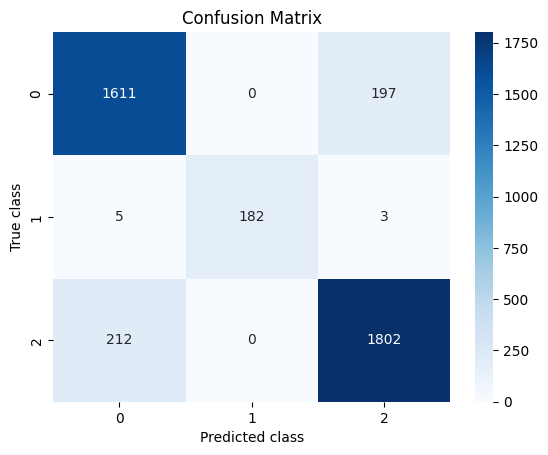

In [236]:
models(model8)

### Summary of Algorithm Performance Metrics

In [237]:
DF=pd.DataFrame({'Algorithm':Algorithm,"Accuracy":Accuracy,'R2_score':R2,'Rmse':RMSE})
DF

,Algorithm,Accuracy,R2_score,Rmse
0,LinearRegression,0.092223,0.001576,0.973914
1,DecisionTreeRegressor,0.655035,0.653592,0.573664
2,RandomForestRegressor,0.627119,0.652728,0.574378
3,GradientBoostingRegressor,0.368644,0.279523,0.827319
4,SVR,0.110668,-0.360645,1.136935
5,xgboost,0.426720,0.639382,0.585311
6,DecisionTreeClassifier,0.894816,0.567353,0.641106
7,RandomForestClassifier,0.896062,0.568665,0.640133


### R² Score Comparison of Algorithms

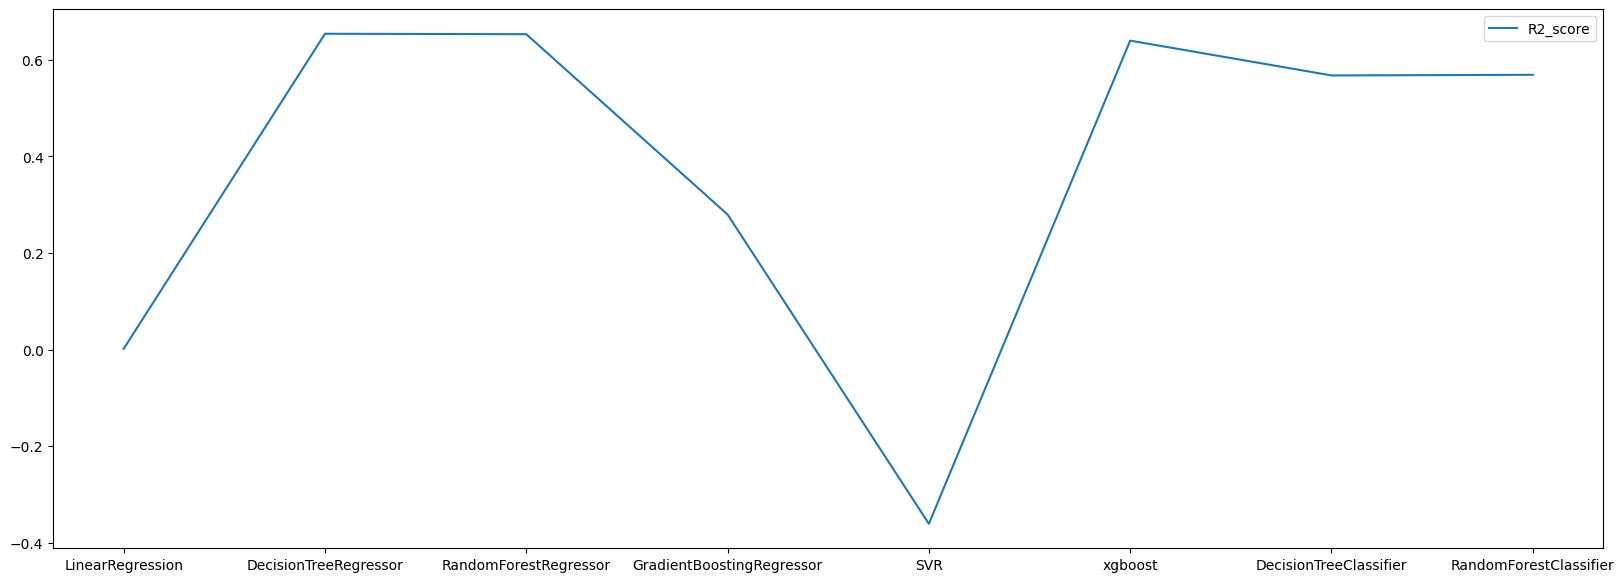

In [238]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.R2_score,label='R2_score')
plt.legend()
plt.show()

### RMSE Comparison of Algorithms

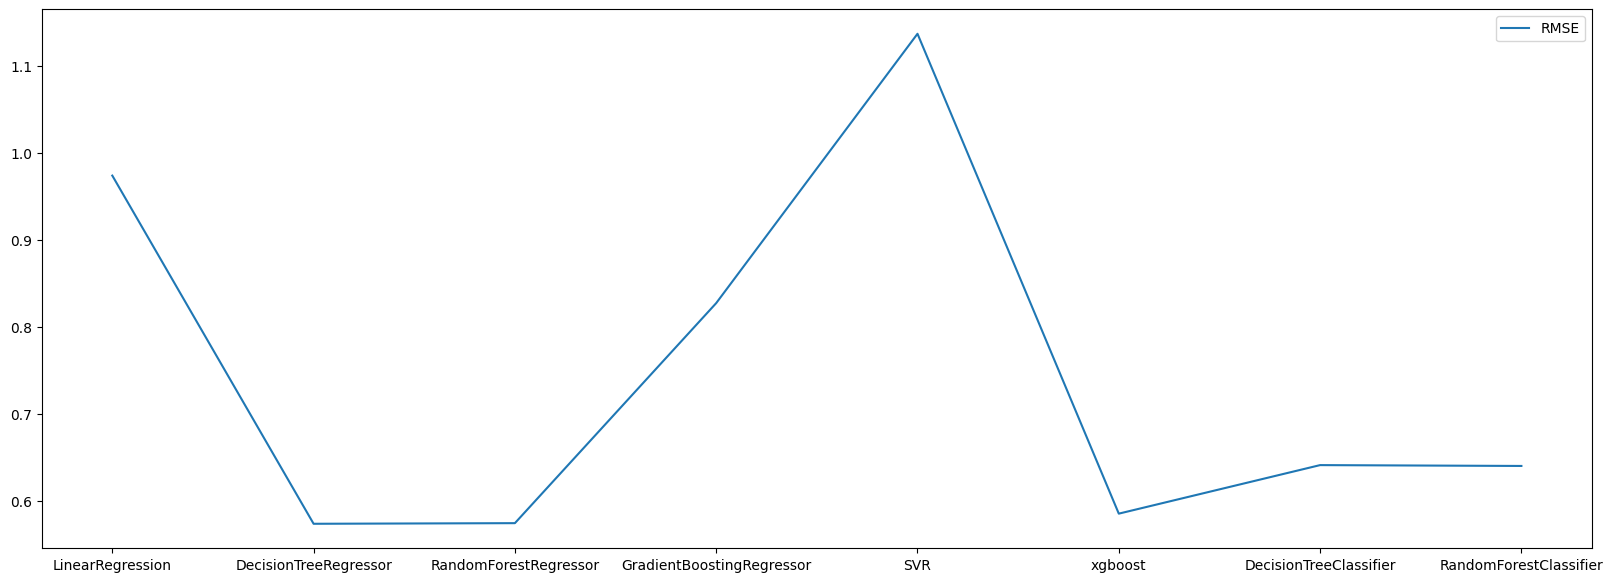

In [239]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.Rmse,label='RMSE')
plt.legend()
plt.show()

### Accuracy Comparison of Algorithms

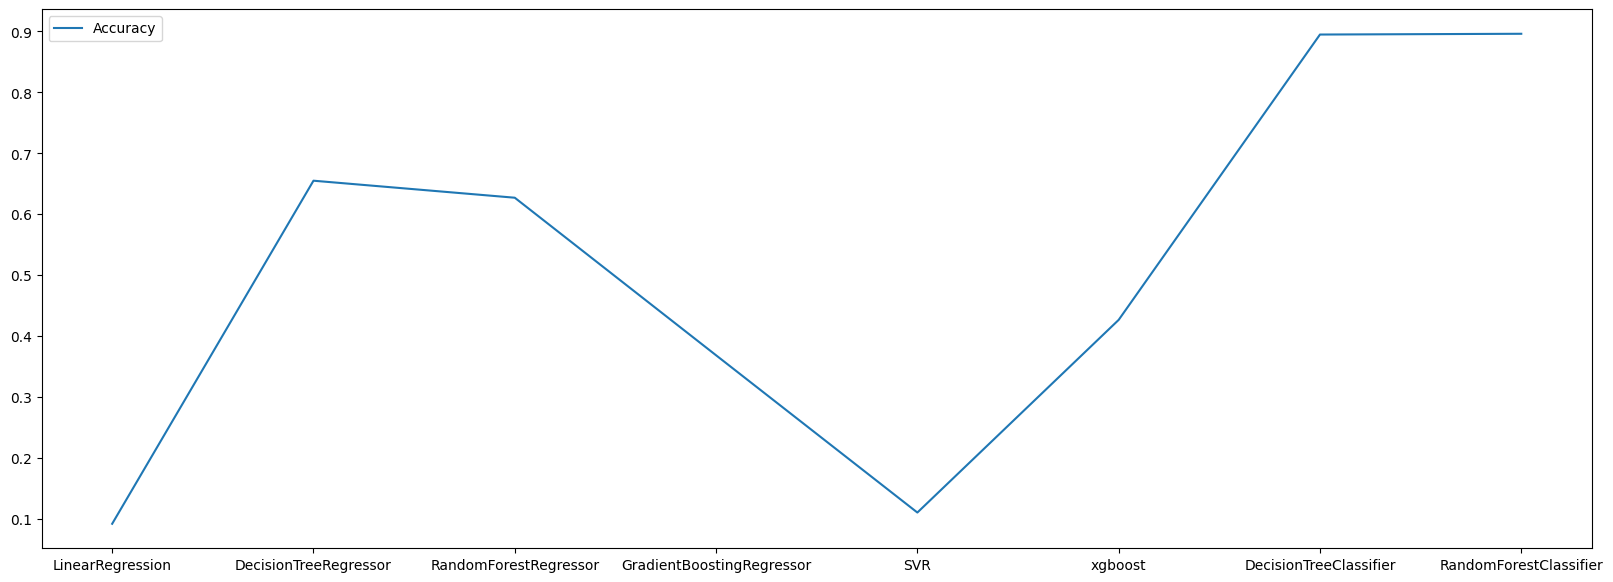

In [240]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.Accuracy,label='Accuracy')
plt.legend()
plt.show()